In [1]:
from fastai.text.all import *

In [2]:
'''
conda create -n fastai python=3.7 #New blank slate env
conda activate fastai
conda install -c pytorch -c fastai fastai #No erors this time
conda list | grep fastai #It shows up now!
conda install jupyter #reinstall jupyter notebook 
'''

'\nconda create -n fastai python=3.7 #New blank slate env\nconda activate fastai\nconda install -c pytorch -c fastai fastai #No erors this time\nconda list | grep fastai #It shows up now!\nconda install jupyter #reinstall jupyter notebook \n'

In [3]:
import pandas as pd
import os

In [4]:
vax_tweets = pd.read_csv("Resources/vaccination_all_tweets.csv")#vaccination_all_tweets.csv downloaded from https://www.kaggle.com/gpreda/all-covid19-vaccines-tweets/activity
vax_tweets.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA","Aggregator of Asian American news; scanning diverse sources 24/7/365. RT's, Follows and 'Likes' will fuel me 👩‍💻",2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s music junkie. Fascinated by meteorology and all things in the cloud. Opinions are my own.",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,"While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P,"['coronavirus', 'SputnikV', 'AstraZeneca', 'PfizerBioNTech', 'Moderna', 'Covid_19']",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radio Network. Weeknights 7 Pacific-10 Eastern - Email comments/ideas to charles@charlesadlertonight.ca",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternative news source from citizen journalists that haven't sold out. Real news & real views,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [5]:
tweets = pd.read_csv('Resources/tweet_dataset.csv')#tweet_dataset.csv downloaded from https://www.kaggle.com/maxjon/complete-tweet-sentiment-extraction-data/activity
tweets.head()

,textID,sentiment,author,text,old_text,aux_id,new_sentiment,selected_text
0,1956967341,empty,xoshayzers,i know i was listenin to bad habit earlier and i started freakin at his part =[,@tiffanylue i know i was listenin to bad habit earlier and i started freakin at his part =[,p1000000000,NaN,NaN
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin on your call...,Layin n bed with a headache ughhhh...waitin on your call...,c811396dc2,negative,headache
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,9063631ab1,negative,gloomy
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends SOON!,2a815f151d,positive,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,"We want to trade with someone who has Houston tickets, but no one will.","@dannycastillo We want to trade with someone who has Houston tickets, but no one will.",82565a56d3,neutral,"We want to trade with someone who has Houston tickets, but no one will."


In [6]:
def de_emojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [7]:
def tweet_proc(df, text_col='text'):
    df['orig_text'] = df[text_col]
    # Remove twitter handles
    df[text_col] = df[text_col].apply(lambda x:re.sub('@[^\s]+','',x))
    # Remove URLs
    df[text_col] = df[text_col].apply(lambda x:re.sub(r"http\S+", "", x))
    # Remove emojis
    df[text_col] = df[text_col].apply(de_emojify)
    # Remove hashtags
    df[text_col] = df[text_col].apply(lambda x:re.sub(r'\B#\S+','',x))
    return df[df[text_col]!='']

In [8]:
# Clean the text data and combine the dfs
tweets = tweets[['old_text', 'new_sentiment']].rename(columns={'old_text':'text', 'new_sentiment':'sentiment'})
vax_tweets['sentiment'] = np.nan
tweets = tweet_proc(tweets)
vax_tweets = tweet_proc(vax_tweets)
df_lm = tweets[['text', 'sentiment']].append(vax_tweets[['text', 'sentiment']])
df_clas = df_lm.dropna(subset=['sentiment'])
print(len(df_lm), len(df_clas))

218810 31323


In [9]:
df_clas.head()

,text,sentiment
1,Layin n bed with a headache ughhhh...waitin on your call...,negative
2,Funeral ceremony...gloomy friday...,negative
3,wants to hang out with friends SOON!,positive
4,"We want to trade with someone who has Houston tickets, but no one will.",neutral
5,Re-pinging why didn't you go to prom? BC my bf didn't like my friends,negative


Training Language Model 
using the DataLoaders class, which converts our input data into a DataLoader object that can be used as an input to a fastai Learner.

In [10]:
dls_lm = TextDataLoaders.from_df(df_lm, text_col='text', is_lm=True, valid_pct=0.1)

Told fastai that we are working with "text" data, which is contained in the "text" column of a pandas DataFrame called "df_lm". We set is_lm=True since we want to train a language model, so fastai needs to label the input data for us. Finally, we told fastai to hold out a random 10% of our data for a validation set using valid_pct=0.1.

Take a look at the first 5 row of DataLoader using show_batch


In [11]:
dls_lm.show_batch(max_n=5)

,text,text_
0,"xxbos [ xxunk ] 411060 , 17 - 06 - 2021 , 60 dose2 at xxmaj bhangire xxmaj hospital - xxup pmcg , xxmaj mohammadwadi xxmaj pune xxbos at last … now just waiting for extra - xxunk or superpowers . joined to xxrep 3 x xxunk . xxbos xxmaj the is the first country in the xxmaj middle xxmaj east and xxmaj north xxmaj africa region to conduct a study of","[ xxunk ] 411060 , 17 - 06 - 2021 , 60 dose2 at xxmaj bhangire xxmaj hospital - xxup pmcg , xxmaj mohammadwadi xxmaj pune xxbos at last … now just waiting for extra - xxunk or superpowers . joined to xxrep 3 x xxunk . xxbos xxmaj the is the first country in the xxmaj middle xxmaj east and xxmaj north xxmaj africa region to conduct a study of the"
1,pincode : 560010 \n xxup sputnik v - xxmaj dose 2 : 95 slots \n\n xxmaj age : 18 and above ( all xxmaj ages ) \n xxmaj date : 13 xxmaj aug 2021 \n xxmaj fees : 1145 \n xxup nu xxup hospit xxbos xxmaj find a xxup covid-19 xxmaj near xxmaj you in xxbos xxmaj where is the scope for diplomatic xxunk in this mess and muddy atmosphere ? xxmaj,: 560010 \n xxup sputnik v - xxmaj dose 2 : 95 slots \n\n xxmaj age : 18 and above ( all xxmaj ages ) \n xxmaj date : 13 xxmaj aug 2021 \n xxmaj fees : 1145 \n xxup nu xxup hospit xxbos xxmaj find a xxup covid-19 xxmaj near xxmaj you in xxbos xxmaj where is the scope for diplomatic xxunk in this mess and muddy atmosphere ? xxmaj simply
2,"xxmaj aug 2021 \n xxmaj fees : 1200 \n xxup apoorva xxup hos xxbos xxmaj if there are any adverse side xxunk ) or injury ( including death ) , who does one call and what is the mechanism pu xxbos xxmaj also with the not driving part i could afford a laptop . xxmaj also living with a roommate i would save even more xxbos xxmaj here we go ; \n\n","aug 2021 \n xxmaj fees : 1200 \n xxup apoorva xxup hos xxbos xxmaj if there are any adverse side xxunk ) or injury ( including death ) , who does one call and what is the mechanism pu xxbos xxmaj also with the not driving part i could afford a laptop . xxmaj also living with a roommate i would save even more xxbos xxmaj here we go ; \n\n xxup"
3,"trump covered xxmaj america xxup not \n▁ xxmaj vaccine doses ordered by xxmaj trump xxmaj admin : \n 1 . 200 mm w an option for a xxbos 560070 , \n xxup age 45 + \n 14-d1 , 20-d2 slots , \n▁ on 16 - 06 - 2021 \n @ xxup nu xxup hospitals xxup padmanabhanagar -(1410rs ) xxbos xxmaj today i xxup hurt . xxmaj my whole body aches and it","covered xxmaj america xxup not \n▁ xxmaj vaccine doses ordered by xxmaj trump xxmaj admin : \n 1 . 200 mm w an option for a xxbos 560070 , \n xxup age 45 + \n 14-d1 , 20-d2 slots , \n▁ on 16 - 06 - 2021 \n @ xxup nu xxup hospitals xxup padmanabhanagar -(1410rs ) xxbos xxmaj today i xxup hurt . xxmaj my whole body aches and it feels"
4,"to sell fake vaccines on facebook by xxunk xxbos xxmaj this train is so squeaky its givin me a sore head its bad enough i have to go to work ! xxbos the xxmaj russian - made vaccine against xxmaj covid-19 , is likely to be available at xxmaj indraprastha xxmaj apollo xxmaj hospital in xxbos xxmaj pfizer / biontech vaccine appears effective against mutation in new coronavirus variants -study | xxmaj","sell fake vaccines on facebook by xxunk xxbos xxmaj this train is so squeaky its givin me a sore head its bad enough i have to go to work ! xxbos the xxmaj russian - made vaccine against xxmaj covid-19 , is likely to be available at xxmaj indraprastha xxmaj apollo xxmaj hospital in xxbos xxmaj pfizer / biontech vaccine appears effective against mutation in new coronavirus variants -study | xxmaj reuters"


create a language model using language_model_learner

In [12]:
lan_learn = language_model_learner(dls_lm, AWD_LSTM, drop_mult=0.3, metrics=[accuracy, Perplexity()]).to_fp16()

/Users/jtangesq/opt/anaconda3/envs/fastai/lib/python3.7/site-packages/torch/cuda/amp/autocast_mode.py:120: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")


/Users/jtangesq/opt/anaconda3/envs/fastai/lib/python3.7/site-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


/Users/jtangesq/opt/anaconda3/envs/fastai/lib/python3.7/site-packages/fastai/callback/schedule.py:269: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.004365158267319202)

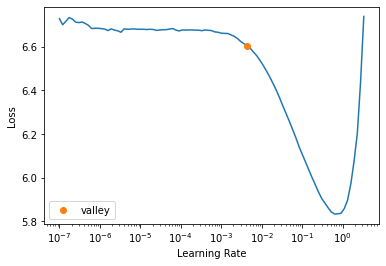

In [13]:
#Using lr_find to find good learning rate 
lan_learn.lr_find()

In [ ]:
'''The pre-trained layers were also automatically frozen for us. Using fit_one_cycle with our Learner 
will train only the new random embeddings (i.e. words that are in our 
Twitter vocab but not the Wikipedia vocab) in the last layer of the neural network.
'''
lan_learn.fit_one_cycle(1, 3e-2)

In [ ]:
#unfreeze the entire model, find a more suitable learning rate and train for a few more epochs 
#to improve the accuracy further.
lan_learn.unfreeze()
lan_learn.lr_find()

In [ ]:
lan_learn.fit_one_cycle(4, 1e-3)

In [ ]:
# Text generation using the language model
TEXT = "I like"
N_WORDS = 30
N_SENTENCES = 2
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

In [ ]:
lan_learn.save_encoder('finetuned_lm')

Train sentiment classifier

In [ ]:
dls_clas = DataBlock(
    blocks = (TextBlock.from_df('text', seq_len=dls_lm.seq_len, vocab=dls_lm.vocab), CategoryBlock),
    get_x=ColReader('text'),
    get_y=ColReader('sentiment'),
    splitter=RandomSplitter()
).dataloaders(df_clas, bs=64)

In [ ]:
dls_clas.show_batch(max_n=2)

In [ ]:
#train the classifier using text_classifier_learner
lan_learn = text_classifier_learner(dls_clas, AWD_LSTM, drop_mult=0.5, metrics=accuracy).to_fp16()

In [ ]:
#Load the encoder from the language model we trained earlier, so our classifier uses pre-trained weights.
lan_learn = learn.load_encoder('finetuned_lm')

Fine-tuning the classifier

In [ ]:
lan_learn.fit_one_cycle(1, 3e-2)

In [ ]:
lan_learn.freeze_to(-2)
lan_learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2))

In [ ]:
lan_learn.freeze_to(-3)
lan_learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3))

In [ ]:
lan_learn.unfreeze()
lan_learn.fit_one_cycle(3, slice(1e-3/(2.6**4),1e-3))

In [ ]:
lan_learn.save('classifier')

In [ ]:
lan_learn.predict("I love")

In [ ]:
lan_learn.predict('I hate')

Analysing the tweets
To carry out sentiment analysis on the vaccine tweets, add them to the DataLoaders as a test set:

In [ ]:
pred_dl = dls_clas.test_dl(vax_tweets['text'])

In [ ]:
preds = lan_learn.get_preds(dl=pred_dl)

In [ ]:
# Get predicted sentiment
import matplotlib as plt
vax_tweets['sentiment'] = preds[0].argmax(dim=-1)
vax_tweets['sentiment'] = vax_tweets['sentiment'].map({0:'negative', 1:'neutral', 2:'positive'})

# Convert dates
vax_tweets['date'] = pd.to_datetime(vax_tweets['date'], errors='coerce').dt.date

# Save to csv
#vax_tweets.to_csv('vax_tweets_sentiment.csv')

# Plot sentiment value counts
vax_tweets['sentiment'].value_counts(normalize=True).plot.bar();

In [ ]:
# Remove today's date since data is incomplete
today = pd.Timestamp.today().date()
vax_tweets = vax_tweets[vax_tweets['date']!=today]

# Get counts of number of tweets by sentiment for each date
timeline = vax_tweets.groupby(['date', 'sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index().dropna()

# Plot results
import plotly.express as px
fig = px.line(timeline, x='date', y='tweets', color='sentiment', category_orders={'sentiment': ['neutral', 'negative', 'positive']},
             title='Timeline showing sentiment of tweets about COVID-19 vaccines')
fig.show()